### This problem is about IBM Employee attrition. Here the target variable is 'Attrition' which has 'Yes' and 'No' values, i.e. the target variable is binary and this is a classification dataset.

##### Before working on the dataset we have to see what challenges we have with the dataset. Since the target variable is binary, this is a classification problem. A few things to get to know before starting to work on the dataset would be as follows. 
    a. No. of attributes: It has 35 attributes in total, which is much more than the datasets we have studied   earlier. So, we may have to deal with Over fitting problem.
    b. Balance in target variable: Since the target variable specifies that this is a classification problem, we have to check whether that variable is balanced well. Based on this, we have to decide what strategy we have to take to solve this problem.
    c. Size of the dataset: From ML point of view, if a dataset has only a few hundreds of observations then the size of dataset is very small. A good dataset in this context should have atleast 50K observations.

### Let's perform EDA first

#### Step 1: Download all the libraries which we generally use while performing EDA and the ones needed for Decision Tree and Random forest models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from collections import Counter
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,recall_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

#### Step 2: Import the data set on which EDA has to be performed

In [2]:
dataset = pd.read_csv('IBM attrition dataset.csv')

#### Step 3: Analyse the dataset and get to know which type of problem it is
    a. We are performing EDA on IBM attrition dataset.
    b. The main intention of building a model on IBM attrition dataset is to predict whether a person is going  to leave the company.
    c. This is a classification problem with two classes, 'Yes' for leaving the company and 'No' for not leaving the company.

#### Step 4: Fetch a few rows to get a gist of the attributes in the data set, whether there are any attributes which are not adding value to the target variable, etc.

In [3]:
dataset.head().T

,0,1,2,3,4
Age,41,49,37,33,27
Attrition,Yes,No,Yes,No,No
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely
DailyRate,1102,279,1373,1392,591
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development
DistanceFromHome,1,8,2,3,2
Education,2,1,2,4,1
EducationField,Life Sciences,Life Sciences,Other,Life Sciences,Medical
EmployeeCount,1,1,1,1,1
EmployeeNumber,1,2,4,5,7


##### By having a look at the data above, we can say that 'EmployeeCount' and 'EmployeeNumber' attributes doesn't add any value to the model and can be excluded from the dataset. Since we haven't performed duplicate check yet, let's proceed with further steps as of now and at the end of EDA we can remove the attributes.

#### Step 5: Get to know the structure of the data set using 'info()'method. Using this we can get to know below things:
    a. Data types of attributes in the data set
    b. Whether any of the attributes in the data set has null values

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

##### By having a look at info above, we can say that there are no null values.

#### Step 6: Get the 6-point summary using 'describe()' method.

In [5]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


##### By looking at values below, we can say that other than below attributes, all are symmetric:
    a. DistanceFromHome
    b. MonthlyIncome
    c. NumCompaniesWorked
    d. StockOptionLevel
    e. YearsAtCompany
    f. YearsInCurrentRole
    g. YearsSinceLastPromotion
    h. YearsWithCurrManager
    
Also, all of the above attributes except 'StockOptionLevel' are right skewed and 'StockOptionLevel' is left skewed

#### Step 7: Let's perform Univariate analysis

#### As first step, let's see the distribution of categorical attributes

In [6]:
# Let's fetch the categorical attributes

categorical_col = []

for column in dataset.columns:
    if len(dataset[column].unique()) <= 10:
        categorical_col.append(column)

In [7]:
# Defining a function to plot bar graph and fetch value counts of each categorical attribute
def bar_plot(variable):
      
    # get feature 
    var = dataset[variable]
    # count number of feature 
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index,varValue)
    plt.xticks(varValue.index,varValue.index.values, rotation=90)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n{}".format(variable,varValue))

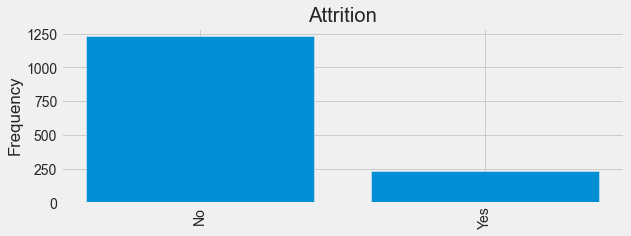

Attrition:
No     1233
Yes     237
Name: Attrition, dtype: int64


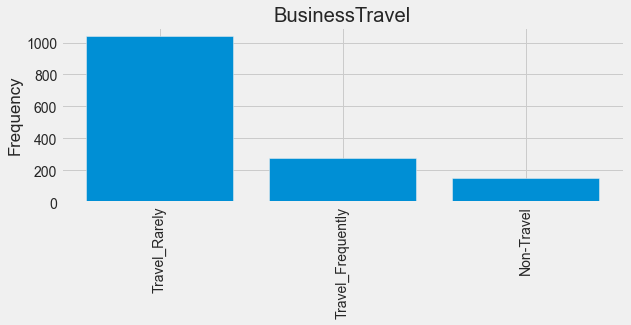

BusinessTravel:
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


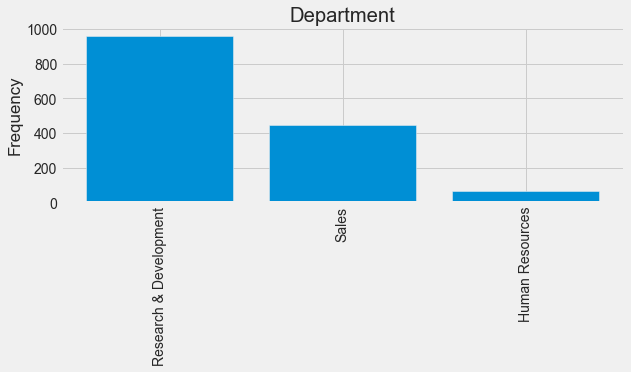

Department:
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


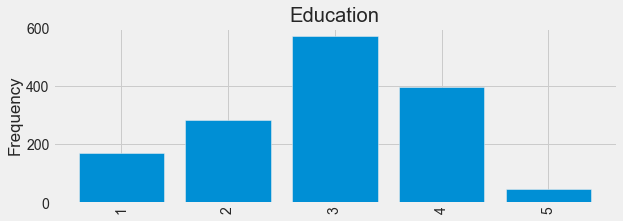

Education:
3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64


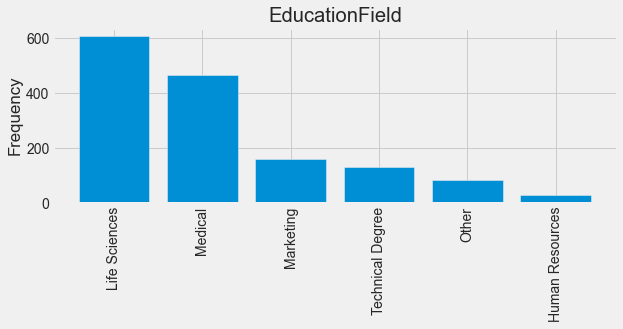

EducationField:
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


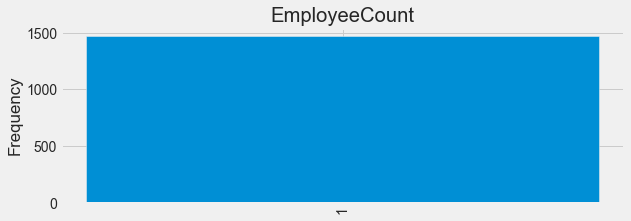

EmployeeCount:
1    1470
Name: EmployeeCount, dtype: int64


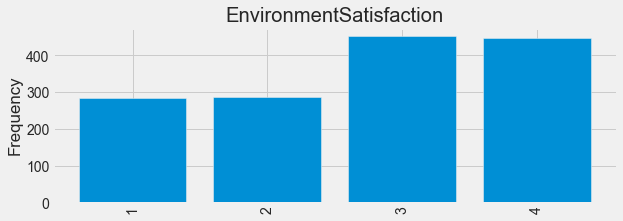

EnvironmentSatisfaction:
3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64


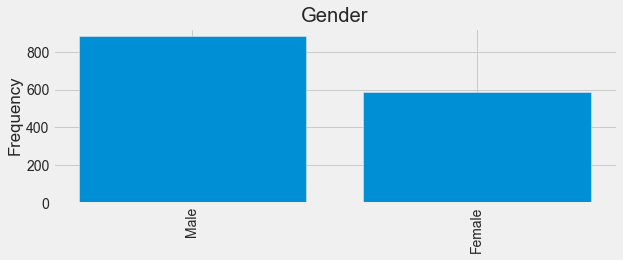

Gender:
Male      882
Female    588
Name: Gender, dtype: int64


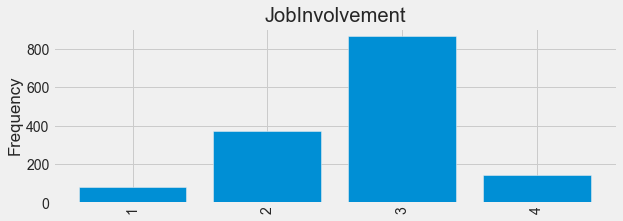

JobInvolvement:
3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64


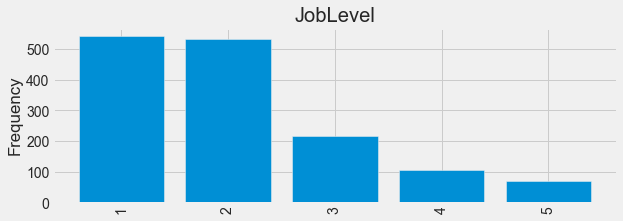

JobLevel:
1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64


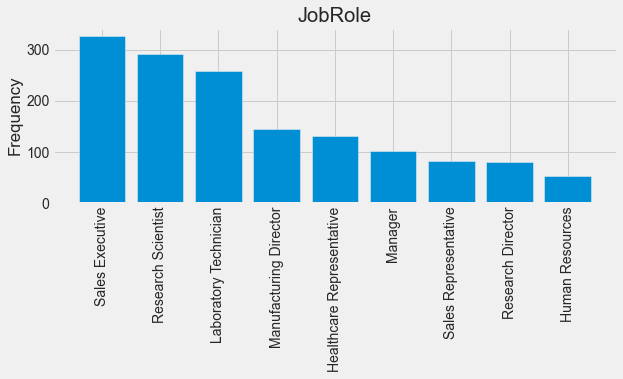

JobRole:
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


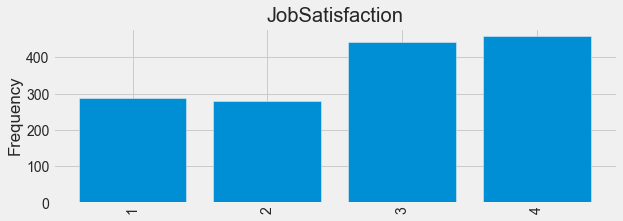

JobSatisfaction:
4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64


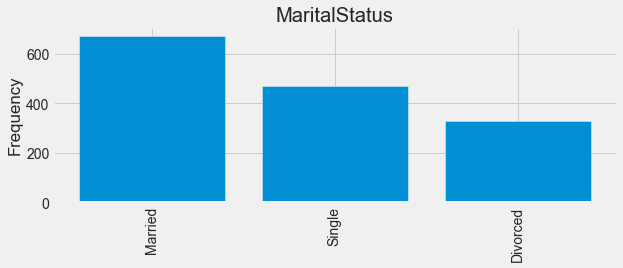

MaritalStatus:
Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


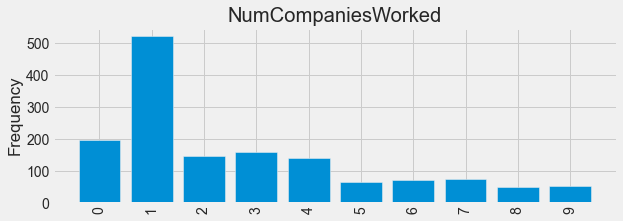

NumCompaniesWorked:
1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64


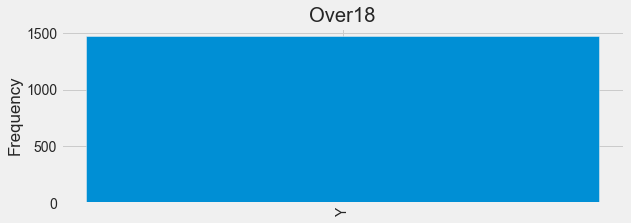

Over18:
Y    1470
Name: Over18, dtype: int64


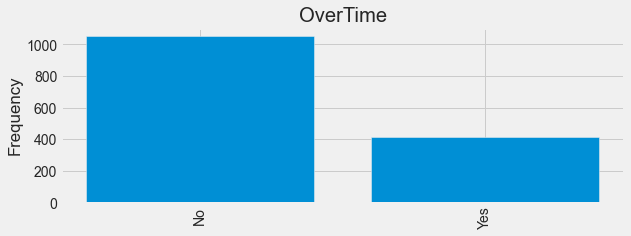

OverTime:
No     1054
Yes     416
Name: OverTime, dtype: int64


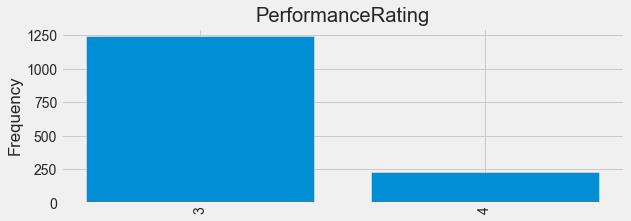

PerformanceRating:
3    1244
4     226
Name: PerformanceRating, dtype: int64


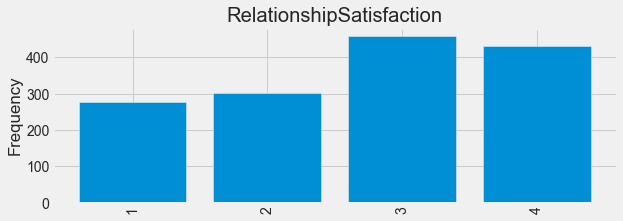

RelationshipSatisfaction:
3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64


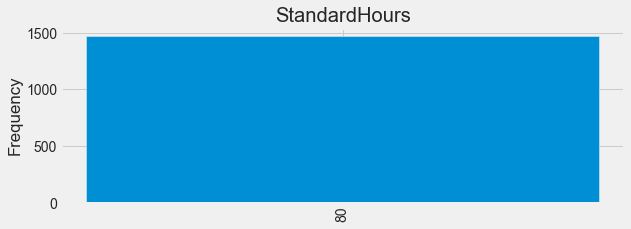

StandardHours:
80    1470
Name: StandardHours, dtype: int64


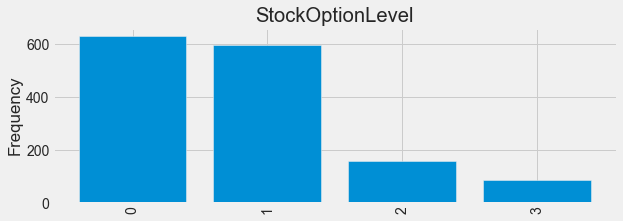

StockOptionLevel:
0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64


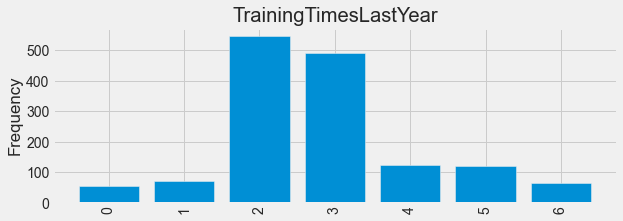

TrainingTimesLastYear:
2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: TrainingTimesLastYear, dtype: int64


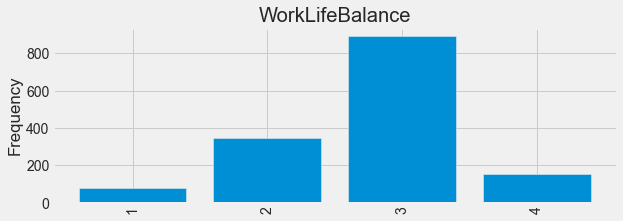

WorkLifeBalance:
3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64


In [8]:
for i in categorical_col:
    bar_plot(i)

##### By looking at the bar plots and value counts above, We can say that:
    a. Apart from 'EmployeeCount' and 'EmployeeNumber' attributes, 'Over18' and 'StandardHours' also don't add  any value to the dataset. Because they have only one unique value. We can remove these attributes also after performing duplicate check.
    b. Target variable, 'Attrition' is heavily imbalanced
    c. Attributes other than 'EnvironmentSatisfaction', 'Gender', 'JobSatisfaction', 'MaritalStatus' and        'RelationshipSatisfaction' are imbalanced.
    d. Attriutes such as 'BusinessTravel', 'Department', 'Gender', 'JobInvolvement', 'OverTime',                'PerformanceRating' and 'WorkLifeBalance' can be considered while checking whether there is Linear Seperabil-ity in the data.
    e. We can reduce dimensionality in 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',   'JobSatisfaction', 'NumCompaniesWorked', 'RelationshipSatisfaction', 'StockOptionLevel',                     'TrainingTimesLastYear' and 'WorkLifeBalance' attributes by combining values. We can do this after checking whether there is Linear Seperability in the data.

#### Now let's compare the distribution of continuous attributes with Normal distribution and see whether any attribute is skewed or has outliers

In [9]:
# Let's fetch Non-categorical attributes first
non_categorical_col = []

for column in dataset.columns:
    if column not in categorical_col:
        non_categorical_col.append(column)

/Users/Surya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-10-79413e7b36e8>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)
/Users/Surya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-10-79413e7b36e8>:9: UserWarning: FixedFormatter should only be used together with Fixed

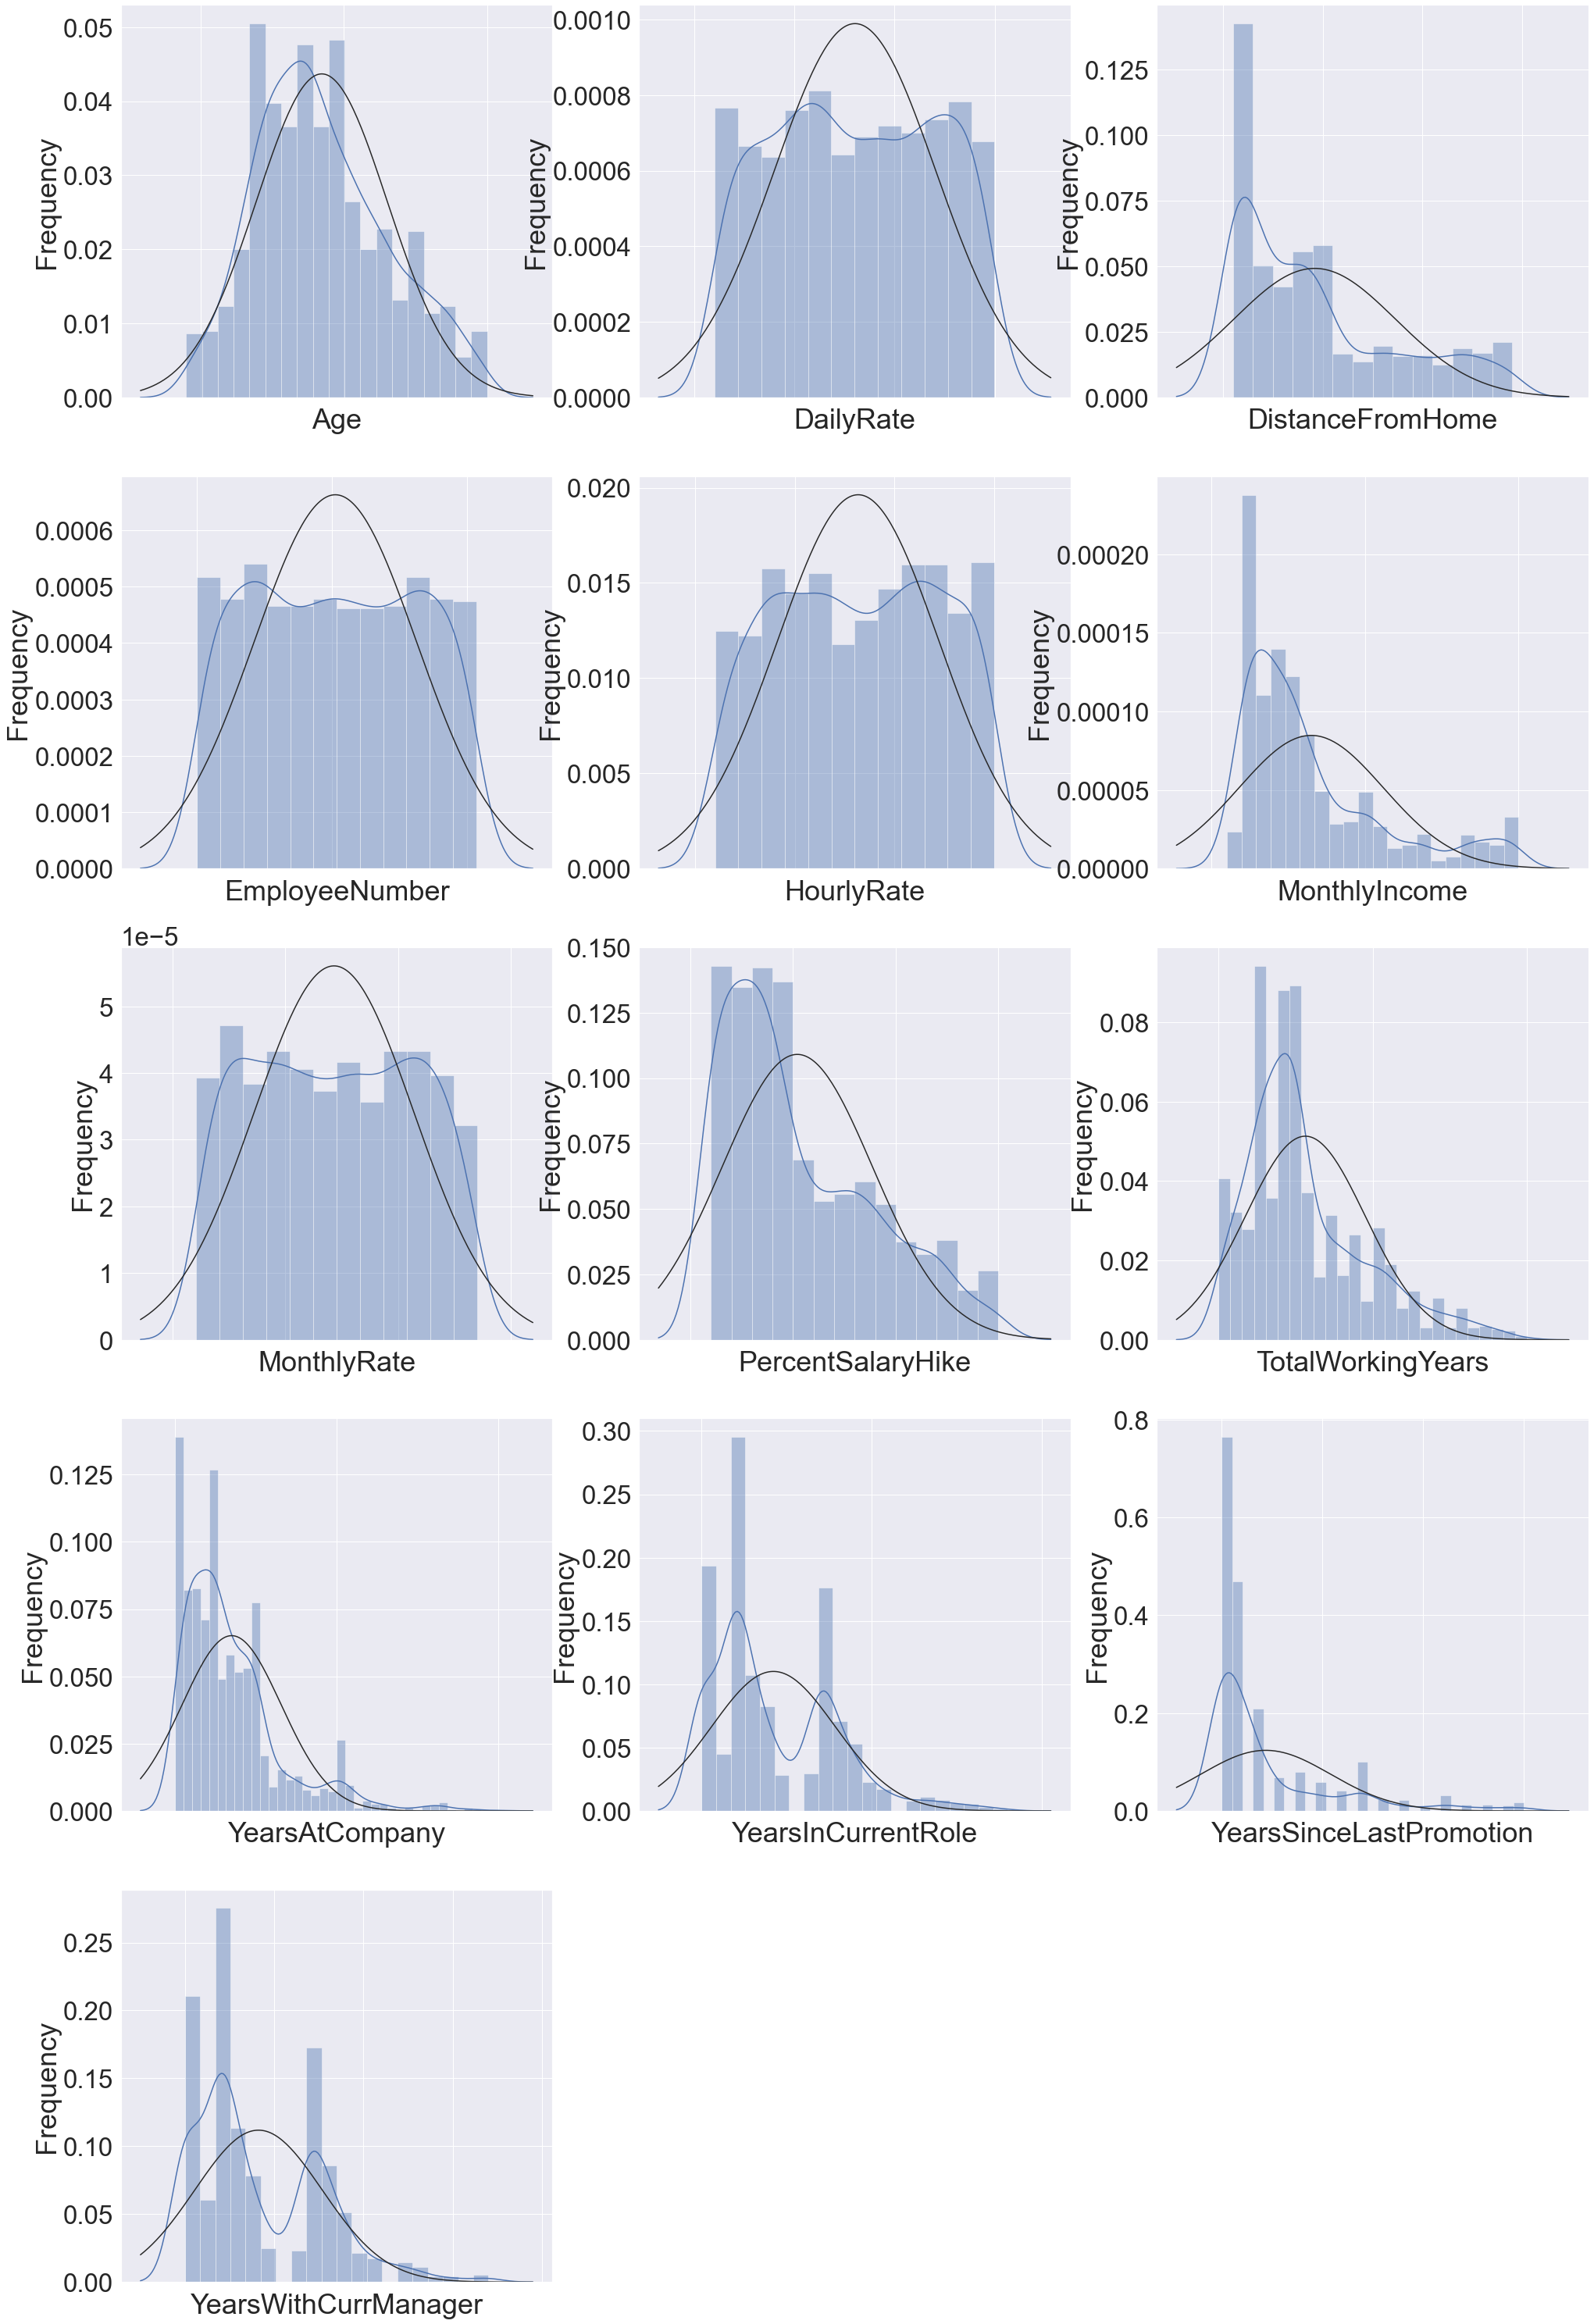

In [10]:
# Let's plot the graph for Non-categorical attributes
sns.set(font_scale=3)
plt.figure(figsize=(30, 50))


for i, column in enumerate(non_categorical_col, 1):
    plt.subplot(5, 3, i)
    g = sns.distplot(dataset[column],fit=norm)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('Frequency')
    plt.xlabel(column)

##### By looking at above plots, we can say that:
    a. None of the attributes other than 'Age' are normally distributed
    b. Most of the atttributes have two bumps, which means that the values are unevenly distributed. We can plot Mean and Median for both the classes in Target variable and see whether there is any Linear Seperability.
    c. 'DistanceFromHome', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',        'YearsSinceLastPromotion' and 'YearsWithCurrManager' attributes have outliers.

#### Step 8: Let's perform Data Sanitation

#### Let's check whether there are any null values

In [11]:
dataset.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

##### Since we don't have null values, we can proceed with other steps

#### Let's check which Non-categorical attributes have Outliers 

In [12]:
# Mathematical Outlier detection

def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

In [13]:
for i in non_categorical_col:
    print(f"Number of Outliers in {i} is:", len(outliers_iqr(dataset[i])[0]))

Number of Outliers in Age is: 0
Number of Outliers in DailyRate is: 0
Number of Outliers in DistanceFromHome is: 0
Number of Outliers in EmployeeNumber is: 0
Number of Outliers in HourlyRate is: 0
Number of Outliers in MonthlyIncome is: 114
Number of Outliers in MonthlyRate is: 0
Number of Outliers in PercentSalaryHike is: 0
Number of Outliers in TotalWorkingYears is: 63
Number of Outliers in YearsAtCompany is: 104
Number of Outliers in YearsInCurrentRole is: 21
Number of Outliers in YearsSinceLastPromotion is: 107
Number of Outliers in YearsWithCurrManager is: 14


##### There are six attributes which have outliers. Among them two of them, 'YearsInCurrentRole' and 'YearsWithCurrManager' have minimal number of outliers and rest of them have outliers between 5% and 8%. Since there are not many outliers, let's check min and max values of each attribute and remove that data if values are unreal.

In [14]:
for i in non_categorical_col:
    if len(outliers_iqr(dataset[i])[0]) >0:
        print(i)
        print('Minimum value:', min(dataset[i]))
        print('Maximum value:', max(dataset[i]))
        print()

MonthlyIncome
Minimum value: 1009
Maximum value: 19999

TotalWorkingYears
Minimum value: 0
Maximum value: 40

YearsAtCompany
Minimum value: 0
Maximum value: 40

YearsInCurrentRole
Minimum value: 0
Maximum value: 18

YearsSinceLastPromotion
Minimum value: 0
Maximum value: 15

YearsWithCurrManager
Minimum value: 0
Maximum value: 17



##### By looking at values above, we can say that min and max values of all the six attributes are real. So,we can proceed with further steps.

#### Let's check whether there are any duplicates and remove them

In [15]:
# Check for duplicates
duplicate = dataset[dataset.duplicated()]

# This will fetch rows which are duplicate. As seen below, there are no duplicate rows in the Dataframe.
duplicate

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


##### There are no duplicates in the data. Now we can remove the attributes which don't add any value.

In [16]:
dataset = dataset.drop('EmployeeCount', axis=1)
dataset = dataset.drop('EmployeeNumber', axis=1)
dataset = dataset.drop('Over18', axis=1)
dataset = dataset.drop('StandardHours', axis=1)

In [17]:
dataset.head().T

,0,1,2,3,4
Age,41,49,37,33,27
Attrition,Yes,No,Yes,No,No
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely
DailyRate,1102,279,1373,1392,591
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development
DistanceFromHome,1,8,2,3,2
Education,2,1,2,4,1
EducationField,Life Sciences,Life Sciences,Other,Life Sciences,Medical
EnvironmentSatisfaction,2,3,4,4,1
Gender,Female,Male,Male,Female,Male


##### Now that we have removed, 'EmployeeCount', 'EmployeeNumber', 'Over18' and 'StandardHours' attributes in the dataset, let's remove them in 'categorical_col' and 'non_categorical_col' lists also.

In [18]:
for i in ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']:
    if i in categorical_col:
        categorical_col.remove(i)
    else:
        non_categorical_col.remove(i)

#### Step 9: Let's perform Bivariate analysis

#### As first step, let's see whether any of the categorical attributes are correlating with target. To get an idea, let's convert Target to 0 and 1 first and then plot barplot.

In [19]:
dataset['Attrition'] = dataset.Attrition.astype("category").cat.codes

In [20]:
dataset['Attrition'].unique()

array([1, 0], dtype=int8)

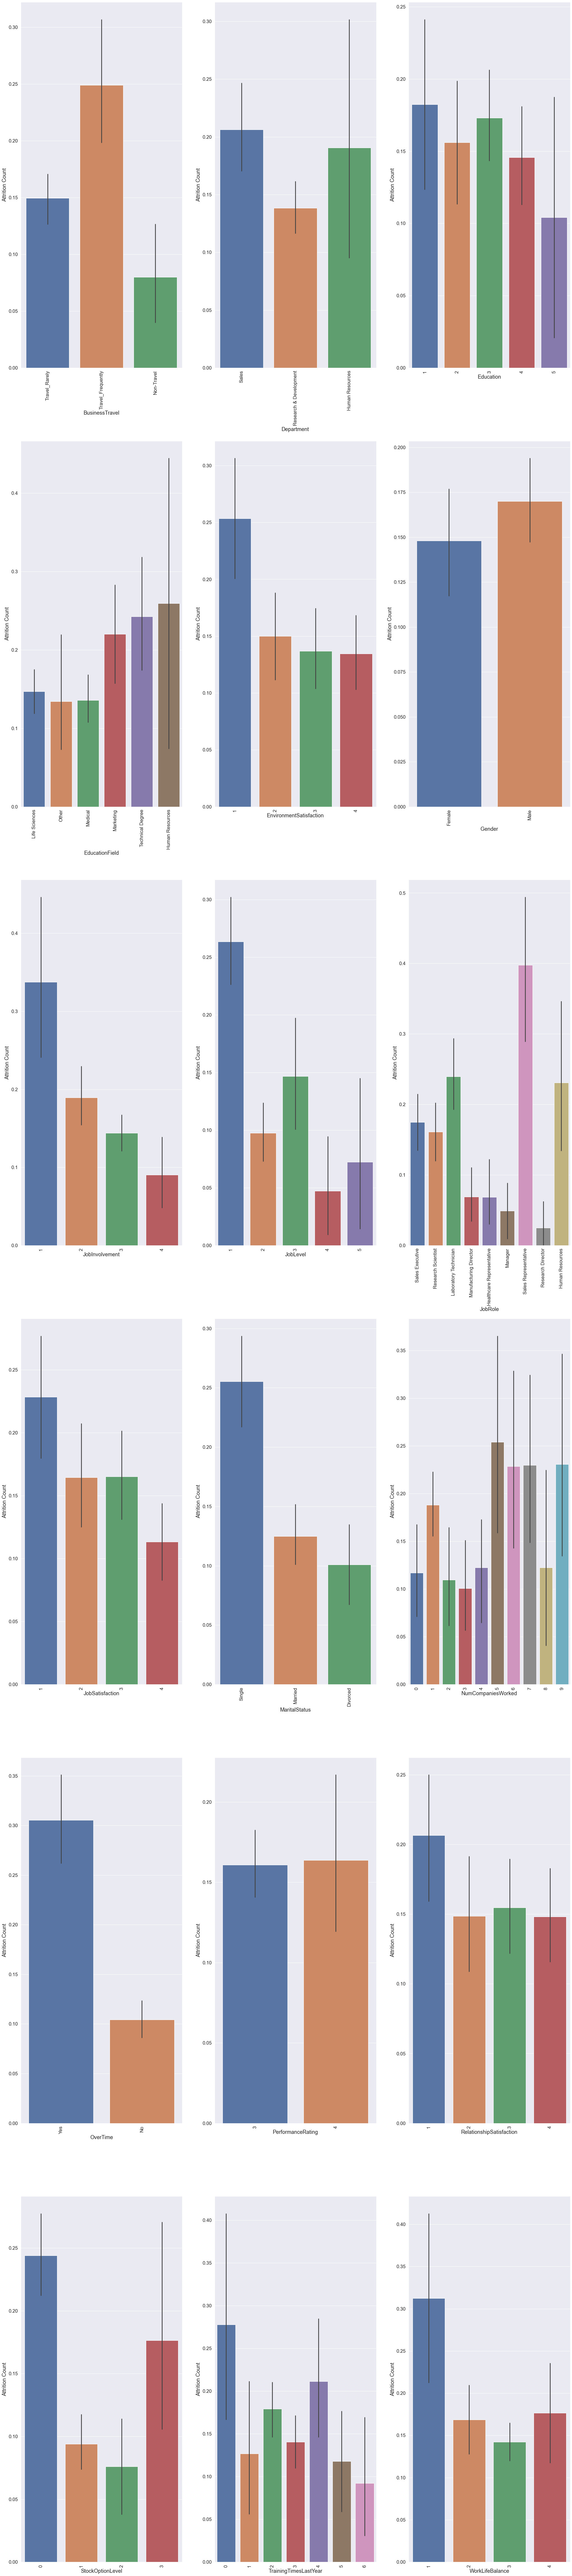

In [21]:
# Plotting how every feature correlate with the "target"
sns.set(font_scale=1.5)
plt.figure(figsize=(30, 150))

for i, column in enumerate(categorical_col[1:], 1):
    plt.subplot(6, 3, i)
    g = sns.barplot(x=f"{column}", y='Attrition', data=dataset)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('Attrition Count')
    plt.xlabel(f'{column}')

**Conclusions:**

***
- `BusinessTravel` : Workers who travel alot are more likely to quit than other employees.

- `Department` : Workers in `Research & Development` are more likely to stay than the workers of other department.

- `EducationField` : Workers in `Life Sciences`, `Other` and `Medical` are more likely to stay than the workers of other Educational fields. We can club `Life Sciences`, `Other` & `Medical` to one and rest to another one.  

- `EnvironmentSatisfaction` : Workers in `EnvironmentSatisfaction` level-1 are more likely to quit when compared to others. Since rest of them have similar values, we can club levels 2, 3 and 4.
    
- `JobInvolvement` : Workers with high job involvement are more likely to stay and as the job involvement reduces, Workers are more likely to quit
    
- `JobLevel` : Workers in Job level-1 are more likely to quit when compared to workers in other job levels.

- `JobRole` : Workers in `Sales Representative` job role are more likely to quit, workers in `Laboratory Technician` and `Human Resources` job roles are also more likely to quit but not as much as workers in `Sales Representative` job role. Workers in all other job roles are less likely to quit when compared to these three.

- `JobSatisfaction` : Workers with lowest level of Job satisfaction are more likely to quit and highest level of Job satisfaction are less likely to quit. Also, we can club levels 2 and 3 since they have similar values.

- `MaritalStatus` : Workers who are `Single` are more likely to quit when compared to others. We can club `Married` and `Divorced` classes.

- `OverTime` : Workers who work more `OverTime` are more likely to quit when compared to others.

- `RelationshipSatisfaction` : Workers in `RelationshipSatisfaction` level-1 are more likely to quit when compared to others. Since rest of them have similar values, we can club levels 2, 3 and 4.

- `StockOptionLevel` : Workers in `StockOptionLevel` level-0 are more likely to quit, then the workers in `StockOptionLevel` level-3 when compared to Workers in other `StockOptionLevel`. Also, we can club levels 1 and 2 since they have similar values.

- `WorkLifeBalance` : Workers in `WorkLifeBalance` level-1 are more more likely to quit when compared to workers in other `WorkLifeBalance` levels. Since rest of them have similar values, we can club levels 2, 3 and 4.

*** 

##### Though we have said that we can combine similar levels in a few categorical attributes, it is better that we build a model without clubbing classes as of now.

#### Let's perform Bivariate analysis on Non-categorical attributes.

#### Let's fetch Mean and Median values for both the classes in attrition to see whether we can find Linear Seperability in the data.

In [22]:
dataset[non_categorical_col].groupby(dataset['Attrition']).mean()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,
0,37.561233,812.504461,8.915653,65.952149,6832.739659,14265.779400,15.231144,11.862936,7.369019,4.484185,2.234388,4.367397
1,33.607595,750.362869,10.632911,65.573840,4787.092827,14559.308017,15.097046,8.244726,5.130802,2.902954,1.945148,2.852321


In [23]:
dataset[non_categorical_col].groupby(dataset['Attrition']).median()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,
0,36,817,7,66,5204,14120,14,10,6,3,1,3
1,32,699,9,66,3202,14618,14,7,3,2,1,2


##### By having a look at Median values, we can say that 'DistanceFromHome', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole' and 'YearsWithCurrManager' are showing Linear Seperability in the data.

##### We usually build correlation matrix when we want to do feature engineering. In this case, since we are building classifier model, feature engineering is not required. Hence we can skip plotting Correlation matrix.

##### Now that we have completed EDA, let's move ahead with Model building.

### Let's start with model building

#### Step 1: When we have categorical variables in a dataset, we usually perform Encoding, i.e. to convert it to numerical values. Based on the scenario we have to implement right method of Encoding. Since we have more number of attributes in the current dataset, One Hot Encoding will increase the number of attributes and thus the complexity. So, we will proceed with Label Encoding.

#### Let's fetch all the categorical attributes and see which attributes can be selected for Label Encoding.

In [24]:
dataset[categorical_col].head().T

,0,1,2,3,4
Attrition,1,0,1,0,0
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development
Education,2,1,2,4,1
EducationField,Life Sciences,Life Sciences,Other,Life Sciences,Medical
EnvironmentSatisfaction,2,3,4,4,1
Gender,Female,Male,Male,Female,Male
JobInvolvement,3,2,2,3,3
JobLevel,2,2,1,1,1
JobRole,Sales Executive,Research Scientist,Laboratory Technician,Research Scientist,Laboratory Technician


##### By looking at the data above, we can say that we can perform Label Encoding on 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus' and 'OverTime' attributes. Let's perform Label Encoding on them.

In [25]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for column in ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']:
    dataset[column] = label.fit_transform(dataset[column])

#### Step 2: Let's split Train data and Test data

#### Let's split Train data and Test data in 70, 30 ratio

In [26]:
from sklearn.model_selection import train_test_split

X = dataset.drop('Attrition', axis=1)
y = dataset.Attrition

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

##### Now that we have split the Train data and Test data, let's try to reduce imbalance using different Techniques.

#### Step 3: Reducing Imbalance in the data using different techniques

#### Before reducing imbalance, let's join X_train and y_train, split the Train data into Majority data and Minority data and fetch the observation counts.

In [27]:
# create the training df by remerging X_train and y_train
df_train = X_train.join(y_train)
df_train.sample(10)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
1413,25,2,977,1,2,1,4,4,1,57,...,3,1,7,2,2,2,2,0,2,0
417,40,2,1398,2,2,4,1,3,0,79,...,4,0,21,2,3,20,15,1,12,0
143,30,2,438,1,18,3,1,1,0,75,...,3,0,5,4,2,5,4,0,4,0
1275,51,2,942,1,3,3,5,1,0,53,...,4,0,15,2,3,2,2,2,2,0
645,29,2,341,2,1,3,3,2,0,48,...,3,3,5,3,3,3,2,0,2,1
262,32,2,128,1,2,1,5,4,1,84,...,4,0,9,5,3,6,2,0,4,0
505,26,2,991,1,6,3,1,3,0,71,...,3,1,3,2,3,3,2,0,2,0
1051,44,1,383,2,1,5,2,1,0,79,...,3,1,11,4,2,1,0,0,0,0
797,26,2,1330,1,21,3,3,1,1,37,...,3,1,1,0,2,1,1,0,0,1
988,41,1,1200,1,22,3,1,4,0,75,...,1,2,12,4,2,6,2,3,3,0


In [28]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df_train[df_train.Attrition==0]
df_minority = df_train[df_train.Attrition==1]

print(df_majority.Attrition.count())
print("-----------")
print(df_minority.Attrition.count())
print("-----------")
print(df_train.Attrition.value_counts())

853
-----------
176
-----------
0    853
1    176
Name: Attrition, dtype: int64


#### Technique 1: Upsampling

In [29]:
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
# Here we are setting 'replace' to True because we need to duplicate the observations
# If 'replace' is set to False, Upsampling cannot happen
                                 replace=True,     # sample with replacement
                                 n_samples=853,    # to match majority class
                                 random_state=34)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
# Display new class counts
df_upsampled.Attrition.value_counts()

1    853
0    853
Name: Attrition, dtype: int64

In [30]:
# Let's split independent variables and target to X and Y respectively
y_upsampled = df_upsampled.Attrition
X_upsampled = df_upsampled.drop(['Attrition'], axis= 1)

#### Technique 2: Downsampling

In [31]:
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
# Here we are setting 'replace' to False because we don't want to create duplicate observations
# We don't want duplicates here because we have to carry as much difference in observations as possible
                                 replace=False,    # sample without replacement
                                 n_samples=176,    # to match minority class
                                 random_state=24)  # reproducible results
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
# Display new class counts
df_downsampled.Attrition.value_counts()

1    176
0    176
Name: Attrition, dtype: int64

In [32]:
# Let's split independent variables and target to X and Y respectively
y_downsampled = df_downsampled.Attrition
X_downsampled = df_downsampled.drop(['Attrition'], axis= 1)

#### Technique 3: SMOTE

In [33]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=587)
X_SMOTE, y_SMOTE = sm.fit_sample(X_train, y_train)
print(y_SMOTE.value_counts())
# Since we didn't combine X and Y while applying SMOTE, we don't have to split them now

1    853
0    853
Name: Attrition, dtype: int64


##### Now that we have balanced the data using Upsampling, Downsampling and SMOTE techniques, let's start with model building.

#### Step 4: Let's build a model using Ada Boost classifier with Hyper parameter tuning on the original Imbalanced data we had

#### Let's perform Hyper parameter tuning on 'n_estimators', which specifies maximum number of estimators at which boosting is terminated, and 'learning_rate', which specifies Weight applied to each classifier at each boosting iteration

In [34]:
param_grid = {'n_estimators': [200,300,400,500],
              'learning_rate' : [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]}

acc_scorer = make_scorer(recall_score)

grid_ada = GridSearchCV(AdaBoostClassifier(random_state=42), param_grid, scoring = acc_scorer, cv=5,verbose = 1,n_jobs = -1)
%time grid_ada = grid_ada.fit(X_train, y_train)

print(grid_ada.best_estimator_)
print(grid_ada.best_score_)

ada_train = grid_ada.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   31.9s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  1.2min finished


CPU times: user 1.64 s, sys: 146 ms, total: 1.79 s
Wall time: 1min 15s
AdaBoostClassifier(learning_rate=0.5, n_estimators=400, random_state=42)
0.4941269841269841


#### Step 5: Let's validate the results

#### Based on the data we have, we can figure out that two metrics are important to evaluate the model:
    a. Recall(Class-1/Attrition): This is the most important metric because if the employee is going to leave    the company, company will try to retain the employee by providing hike and other perks.
    b. precision(Class-0/No Attrition): This is second most important metric because if the employee is not     going to leave the company, then there is no point in wasting the resources.

#### Let's define a function named 'print_score' to give us accuracy score based on the model we use. In below case, we are using 'clf' model to predict the values and hence we get the accuracy score of that model. This model calculates accuracy for both Train data and Test data. We will use this model at later point to get to know the accuracy of the models we built.

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

#### Let's use 'print_score' function to fetch the accuracy of Train data and Test data

In [36]:
print_score(ada_train, X_train, y_train, X_test, y_test, train=True)
print_score(ada_train, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 93.68%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.937778    0.930233  0.936832     0.934005      0.936487
recall       0.989449    0.681818  0.936832     0.835634      0.936832
f1-score     0.962921    0.786885  0.936832     0.874903      0.932812
support    853.000000  176.000000  0.936832  1029.000000   1029.000000
_______________________________________________
Confusion Matrix: 
 [[844   9]
 [ 56 120]]

Test Result:
Accuracy Score: 86.39%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.900000   0.512195  0.863946    0.706098      0.846358
recall       0.947368   0.344262  0.863946    0.645815      0.863946
f1-score     0.923077   0.411765  0.863946    0.667421      0.852351
support    380.000000  61.000000  0.863946  441.000000    441.

##### By looking at the results, we can say that this model has Over-fitting problem and Recall value for Class-1 is not good. Let's build AdaBoost models with balanced data and see whether we get better results. 

#### Step 6: Let's build a model using Ada Boost classifier with Hyper parameter tuning on Upsampled data

In [37]:
param_grid = {'n_estimators': [200,300,400,500],
              'learning_rate' : [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]}

acc_scorer = make_scorer(recall_score)

grid_ada = GridSearchCV(AdaBoostClassifier(random_state=42), param_grid, scoring = acc_scorer, cv=5,verbose = 1,n_jobs = -1)
%time grid_ada = grid_ada.fit(X_upsampled, y_upsampled)

print(grid_ada.best_estimator_)
print(grid_ada.best_score_)

ada_train_upsampled = grid_ada.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  1.3min finished


CPU times: user 2.26 s, sys: 71.5 ms, total: 2.33 s
Wall time: 1min 18s
AdaBoostClassifier(learning_rate=0.5, n_estimators=500, random_state=42)
0.922593739250086


#### Step 7: Let's validate the results using 'print_score' function

In [38]:
print_score(ada_train_upsampled, X_upsampled, y_upsampled, X_test, y_test, train=True)
print_score(ada_train_upsampled, X_upsampled, y_upsampled, X_test, y_test, train=False)

Train Result:
Accuracy Score: 92.56%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.949257    0.904232  0.925557     0.926745      0.926745
recall       0.899179    0.951934  0.925557     0.925557      0.925557
f1-score     0.923540    0.927470  0.925557     0.925505      0.925505
support    853.000000  853.000000  0.925557  1706.000000   1706.000000
_______________________________________________
Confusion Matrix: 
 [[767  86]
 [ 41 812]]

Test Result:
Accuracy Score: 79.59%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.926471   0.356436  0.795918    0.641453      0.847622
recall       0.828947   0.590164  0.795918    0.709556      0.795918
f1-score     0.875000   0.444444  0.795918    0.659722      0.815445
support    380.000000  61.000000  0.795918  441.000000    441.

##### By looking at the results, we can say that Overfitting problem has reduced a bit, but it still persists. But, in terms of Recall value for Class-1, this model has given us better results when compared to the results of model we have built on the original imbalanced data. But, Precision for Class-1 has decreased, which is expected because we have set scoring parameter as "Recall" in "GridSearchCV"

#### Step 8: Let's build a model using Ada Boost classifier with Hyper parameter tuning on Downsampled data

In [39]:
param_grid = {'n_estimators': [200,300,400,500],
              'learning_rate' : [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]}

acc_scorer = make_scorer(recall_score)

grid_ada = GridSearchCV(AdaBoostClassifier(random_state=42), param_grid, scoring = acc_scorer, cv=5,verbose = 1,n_jobs = -1)
%time grid_ada = grid_ada.fit(X_downsampled, y_downsampled)

print(grid_ada.best_estimator_)
print(grid_ada.best_score_)

ada_train_downsampled = grid_ada.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   51.4s finished


CPU times: user 1.04 s, sys: 49.5 ms, total: 1.09 s
Wall time: 52.1 s
AdaBoostClassifier(learning_rate=0.4, n_estimators=300, random_state=42)
0.7841269841269842


#### Step 9: Let's validate the results using 'print_score' function

In [40]:
print_score(ada_train_downsampled, X_downsampled, y_downsampled, X_test, y_test, train=True)
print_score(ada_train_downsampled, X_downsampled, y_downsampled, X_test, y_test, train=False)

Train Result:
Accuracy Score: 95.45%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.944444    0.965116  0.954545    0.954780      0.954780
recall       0.965909    0.943182  0.954545    0.954545      0.954545
f1-score     0.955056    0.954023  0.954545    0.954540      0.954540
support    176.000000  176.000000  0.954545  352.000000    352.000000
_______________________________________________
Confusion Matrix: 
 [[170   6]
 [ 10 166]]

Test Result:
Accuracy Score: 71.43%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.934932   0.281879  0.714286    0.608405      0.844600
recall       0.718421   0.688525  0.714286    0.703473      0.714286
f1-score     0.812500   0.400000  0.714286    0.606250      0.755442
support    380.000000  61.000000  0.714286  441.000000    441.00000

##### By looking at the results, we can say that Overfitting problem still persists. But, in terms of Recall value for Class-1, this model has given us best results when compared to the results of other models we have built till now. Also, this model has given us the least value of Precision for Class-1, which could be better.

#### Step 10: Let's build a model using Ada Boost classifier with Hyper parameter tuning on SMOTE data

In [41]:
param_grid = {'n_estimators': [200,300,400,500],
              'learning_rate' : [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]}

acc_scorer = make_scorer(recall_score)

grid_ada = GridSearchCV(AdaBoostClassifier(random_state=42), param_grid, scoring = acc_scorer, cv=5,verbose = 1,n_jobs = -1)
%time grid_ada = grid_ada.fit(X_SMOTE, y_SMOTE)

print(grid_ada.best_estimator_)
print(grid_ada.best_score_)

ada_train_SMOTE = grid_ada.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   27.5s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  1.3min finished


CPU times: user 2.32 s, sys: 65.2 ms, total: 2.39 s
Wall time: 1min 20s
AdaBoostClassifier(learning_rate=0.3, n_estimators=500, random_state=42)
0.8337805297557619


#### Step 11: Let's validate the results using 'print_score' function

In [42]:
print_score(ada_train_SMOTE, X_SMOTE, y_SMOTE, X_test, y_test, train=True)
print_score(ada_train_SMOTE, X_SMOTE, y_SMOTE, X_test, y_test, train=False)

Train Result:
Accuracy Score: 92.32%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.928741    0.917824  0.923212     0.923283      0.923283
recall       0.916764    0.929660  0.923212     0.923212      0.923212
f1-score     0.922714    0.923704  0.923212     0.923209      0.923209
support    853.000000  853.000000  0.923212  1706.000000   1706.000000
_______________________________________________
Confusion Matrix: 
 [[782  71]
 [ 60 793]]

Test Result:
Accuracy Score: 81.86%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.914365   0.379747  0.818594    0.647056      0.840415
recall       0.871053   0.491803  0.818594    0.681428      0.818594
f1-score     0.892183   0.428571  0.818594    0.660377      0.828056
support    380.000000  61.000000  0.818594  441.000000    441.

##### By looking at the results, we can say that results of this model is similar to the AdaBoost model we have built on Upsampled data

##### When we compare results of all the AdaBoost models we have built till now, AdaBoost model on Downsampled data has given us best results in terms of Recall for Class-1 and Precision for Class-0, which are important parameters according to us. But, it has given us very low value of Precision for Class-1, which could have been better.

##### Now that we have built models using AdaBoostClassifier, let's build models using GradientBoostingClassifier and see whether we get better results.

#### Step 12: Let's build a model using Gradient Boosting classifier with Hyper parameter tuning on the original Imbalanced data we had

#### Let's perform Hyper parameter tuning on 'n_estimators', which specifies maximum number of estimators at which boosting is terminated, 'learning_rate', which specifies Weight applied to each classifier at each boosting iteration, and 'max_depth', which specifies max number of layers to be allowed in each Tree built as part of this model.

In [43]:
param_grid = {'n_estimators': [200,300,400,500],
              'learning_rate' : [0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
              'max_depth':(list(range(1,5)))
             }

acc_scorer = make_scorer(recall_score)

grid_gbc = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, scoring = acc_scorer, cv=5,verbose = 1,n_jobs = -1)
%time grid_gbc = grid_gbc.fit(X_train, y_train)

print(grid_gbc.best_estimator_)
print(grid_gbc.best_score_)

gbc_train = grid_gbc.best_estimator_

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  3.3min finished


CPU times: user 2.48 s, sys: 164 ms, total: 2.65 s
Wall time: 3min 21s
GradientBoostingClassifier(learning_rate=0.5, max_depth=1, n_estimators=500,
                           random_state=42)
0.46571428571428575


#### Step 13: Let's validate the results using 'print_score' function

In [44]:
print_score(gbc_train, X_train, y_train, X_test, y_test, train=True)
print_score(gbc_train, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 94.95%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.946488    0.969697  0.949466     0.958093      0.950458
recall       0.995311    0.727273  0.949466     0.861292      0.949466
f1-score     0.970286    0.831169  0.949466     0.900727      0.946491
support    853.000000  176.000000  0.949466  1029.000000   1029.000000
_______________________________________________
Confusion Matrix: 
 [[849   4]
 [ 48 128]]

Test Result:
Accuracy Score: 86.85%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.902500   0.536585  0.868481    0.719543      0.851886
recall       0.950000   0.360656  0.868481    0.655328      0.868481
f1-score     0.925641   0.431373  0.868481    0.678507      0.857273
support    380.000000  61.000000  0.868481  441.000000    441.

##### By looking at the results, we can say that this model has Overfitting problem to a very small extent. But, in terms of Recall value for Class-1, this model has not given us satisfactory results.

#### Step 14: Let's build a model using Gradient Boosting classifier with Hyper parameter tuning on Upsampled data

In [45]:
param_grid = {'n_estimators': [200,300,400,500],
              'learning_rate' : [0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
              'max_depth':(list(range(1,5)))
             }

acc_scorer = make_scorer(recall_score)

grid_gbc = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, scoring = acc_scorer, cv=5,verbose = 1,n_jobs = -1)
%time grid_gbc = grid_gbc.fit(X_upsampled, y_upsampled)

print(grid_gbc.best_estimator_)
print(grid_gbc.best_score_)

gbc_upsampled = grid_gbc.best_estimator_

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  4.6min finished


CPU times: user 2.44 s, sys: 186 ms, total: 2.63 s
Wall time: 4min 35s
GradientBoostingClassifier(learning_rate=0.5, max_depth=2, n_estimators=200,
                           random_state=42)
0.9906295149638803


#### Step 15: Let's validate the results using 'print_score' function

In [46]:
print_score(gbc_upsampled, X_upsampled, y_upsampled, X_test, y_test, train=True)
print_score(gbc_upsampled, X_upsampled, y_upsampled, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    853.0  853.0       1.0     1706.0        1706.0
_______________________________________________
Confusion Matrix: 
 [[853   0]
 [  0 853]]

Test Result:
Accuracy Score: 86.17%
_______________________________________________
CLASSIFICATION REPORT:
                    0         1  accuracy   macro avg  weighted avg
precision    0.923077   0.50000  0.861678    0.711538      0.864556
recall       0.915789   0.52459  0.861678    0.720190      0.861678
f1-score     0.919419   0.51200  0.861678    0.715709      0.863064
support    380.000000  61.00000  0.861678  441.000000    441.000000
_______________________________________________
Confusion

##### By looking at the results, we can say that this model has Overfitting problem to a very large extent. In terms of Recall value for Class-1, this model is better than Gradient Boosting model built on original imbalanced data.

#### Step 16: Let's build a model using Gradient Boosting classifier with Hyper parameter tuning on Downsampled data

In [47]:
param_grid = {'n_estimators': [200,300,400,500],
              'learning_rate' : [0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
              'max_depth':(list(range(1,5)))
             }

acc_scorer = make_scorer(recall_score)

grid_gbc = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, scoring = acc_scorer, cv=5,verbose = 1,n_jobs = -1)
%time grid_gbc = grid_gbc.fit(X_downsampled, y_downsampled)

print(grid_gbc.best_estimator_)
print(grid_gbc.best_score_)

gbc_downsampled = grid_gbc.best_estimator_

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   40.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  1.8min finished


CPU times: user 1.9 s, sys: 154 ms, total: 2.06 s
Wall time: 1min 49s
GradientBoostingClassifier(learning_rate=0.5, max_depth=1, n_estimators=300,
                           random_state=42)
0.7955555555555557


#### Step 17: Let's validate the results using 'print_score' function

In [48]:
print_score(gbc_downsampled, X_downsampled, y_downsampled, X_test, y_test, train=True)
print_score(gbc_downsampled, X_downsampled, y_downsampled, X_test, y_test, train=False)

Train Result:
Accuracy Score: 96.88%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.950820    0.988166   0.96875    0.969493      0.969493
recall       0.988636    0.948864   0.96875    0.968750      0.968750
f1-score     0.969359    0.968116   0.96875    0.968738      0.968738
support    176.000000  176.000000   0.96875  352.000000    352.000000
_______________________________________________
Confusion Matrix: 
 [[174   2]
 [  9 167]]

Test Result:
Accuracy Score: 69.39%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.935943   0.268750  0.693878    0.602347      0.843656
recall       0.692105   0.704918  0.693878    0.698512      0.693878
f1-score     0.795764   0.389140  0.693878    0.592452      0.739519
support    380.000000  61.000000  0.693878  441.000000    441.00000

##### By looking at the results, we can say that this model has reduced Overfitting problem to an extent. In terms of Recall value for Class-1, this model has given us best results when compared to other Gradient Boosting model. But, Precision for Class-1 has reduced drastically. This value could have been better.

##### Step 18: Let's build a model using Gradient Boosting classifier with Hyper parameter tuning on SMOTE data

In [49]:
param_grid = {'n_estimators': [200,300,400,500],
              'learning_rate' : [0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
              'max_depth':(list(range(1,5)))
             }

acc_scorer = make_scorer(recall_score)

grid_gbc = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, scoring = acc_scorer, cv=5,verbose = 1,n_jobs = -1)
%time grid_gbc = grid_gbc.fit(X_SMOTE, y_SMOTE)

print(grid_gbc.best_estimator_)
print(grid_gbc.best_score_)

gbc_SMOTE = grid_gbc.best_estimator_

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  4.9min finished


CPU times: user 4.54 s, sys: 190 ms, total: 4.73 s
Wall time: 4min 55s
GradientBoostingClassifier(max_depth=4, n_estimators=400, random_state=42)
0.8841761265909872


#### Step 19: Let's validate the results using 'print_score' function

In [50]:
print_score(gbc_SMOTE, X_SMOTE, y_SMOTE, X_test, y_test, train=True)
print_score(gbc_SMOTE, X_SMOTE, y_SMOTE, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    853.0  853.0       1.0     1706.0        1706.0
_______________________________________________
Confusion Matrix: 
 [[853   0]
 [  0 853]]

Test Result:
Accuracy Score: 84.81%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.900256   0.440000  0.848073    0.670128      0.836592
recall       0.926316   0.360656  0.848073    0.643486      0.848073
f1-score     0.913100   0.396396  0.848073    0.654748      0.841628
support    380.000000  61.000000  0.848073  441.000000    441.000000
_______________________________________________
Conf

##### By looking at the results, we can say that this model has huge Overfitting problem. In terms of Recall value for Class-1 and Precision value for Class-1, this model has not given us satisfactory results.

##### When we compare results of all the Gradient Boosting models we have built till now, Gradient Boosting model on Downsampled data has given us best results in terms of Recall for Class-1 and Precision for Class-0, which are important parameters according to us. But, it has given us very low value of Precision for Class-1, which could have been better.

##### Now that we have built models using GradientBoostingClassifier, let's build models using XG Boost and see whether we get better results.

#### Step 20: Let's build a model using XG Boost algorithm with Hyper parameter tuning on the original Imbalanced data we had

#### Let's perform Hyper parameter tuning on following parameters:
    a. 'learning_rate': It Weight applied to each classifier at each boosting iteration
    b. 'max_depth': It specifies max number of layers to be allowed in each Tree built as part of this model
    c. 'min_child_weight': It specifies minimum number of instances needed to be in each child node so that     parent node can be split
    d. 'subsample': It specifies amount of training data that would be random sampled before growing trees
    e. 'colsample_bytree': It specifies amount of columns random sampled before growing trees. This sub sampling happens for each Tree.
    f. 'n_estimators': It specifies maximum number of estimators at which boosting is terminated

#### Let's write a function to perform Hyper paremeter tuning and using the same for upcoming samples

In [51]:
def hyperParameterTuning(x,y):
    param_tuning = {
        'learning_rate' : [0.05, 0.1, 0.3],
        'max_depth':[3, 4, 5],
        'min_child_weight': [2, 3, 4],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [200, 300, 500],
    }

    xgb_model = XGBClassifier()
    acc_scorer = make_scorer(recall_score)

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           scoring = acc_scorer,  
                           cv = 5,
                           verbose = 2,
                           n_jobs = -1
                          )

    gsearch.fit(x,y)

    return gsearch.best_params_

#### Let's perform Hyper parameter tuning using "hyperParameterTuning()" function we have written

In [52]:
hyperParameterTuning(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 29.8min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 32.7min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed: 33.7min finished
/Users/Surya/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:11:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'colsample_bytree': 0.5,
 'learning_rate': 0.3,
 'max_depth': 5,
 'min_child_weight': 4,
 'n_estimators': 300,
 'subsample': 0.5}

#### Now that we have got the best parameters, let's pass the same and build the model

In [53]:
xgb_train = XGBClassifier(
        colsample_bytree = 0.5,
        learning_rate = 0.3,
        max_depth = 5,
        min_child_weight = 4,
        n_estimators = 300,
        subsample = 0.5)

xgb_train.fit(X_train, y_train)

[18:12:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=4, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.5, tree_method='exact', validate_parameters=1,
              verbosity=None)

#### Step 21: Let's validate the results using 'print_score' function

In [54]:
print_score(xgb_train, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_train, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.61%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.995333    1.000000  0.996113     0.997666      0.996131
recall       1.000000    0.977273  0.996113     0.988636      0.996113
f1-score     0.997661    0.988506  0.996113     0.993083      0.996095
support    853.000000  176.000000  0.996113  1029.000000   1029.000000
_______________________________________________
Confusion Matrix: 
 [[853   0]
 [  4 172]]

Test Result:
Accuracy Score: 85.03%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.896465   0.444444   0.85034    0.670455      0.833940
recall       0.934211   0.327869   0.85034    0.631040      0.850340
f1-score     0.914948   0.377358   0.85034    0.646153      0.840588
support    380.000000  61.000000   0.85034  441.000000    441.

##### By looking at the results, we can say that this model has Overfitting problem to a very large extent. In terms of Recall value for Class-1 also, this model has not given us satisfactory results.

#### Step 22: Let's build a model using XG Boost algorithm with Hyper parameter tuning on Upsampled data

#### Let's perform Hyper parameter tuning using "hyperParameterTuning()" function we have written

In [55]:
hyperParameterTuning(X_upsampled, y_upsampled)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed: 13.3min finished
/Users/Surya/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:25:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'colsample_bytree': 0.7,
 'learning_rate': 0.3,
 'max_depth': 3,
 'min_child_weight': 2,
 'n_estimators': 200,
 'subsample': 0.7}

#### Now that we have got the best parameters, let's pass the same and build the model

In [56]:
xgb_upsampled = XGBClassifier(
        colsample_bytree = 0.7,
        learning_rate = 0.3,
        max_depth = 3,
        min_child_weight = 2,
        n_estimators = 200,
        subsample = 0.7)

xgb_upsampled.fit(X_upsampled, y_upsampled)

[18:26:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=3,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.7, tree_method='exact', validate_parameters=1,
              verbosity=None)

#### Step 23: Let's validate the results using 'print_score' function

In [57]:
print_score(xgb_upsampled, X_upsampled, y_upsampled, X_test, y_test, train=True)
print_score(xgb_upsampled, X_upsampled, y_upsampled, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    853.0  853.0       1.0     1706.0        1706.0
_______________________________________________
Confusion Matrix: 
 [[853   0]
 [  0 853]]

Test Result:
Accuracy Score: 86.39%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.910256   0.509804  0.863946    0.710030      0.854865
recall       0.934211   0.426230  0.863946    0.680220      0.863946
f1-score     0.922078   0.464286  0.863946    0.693182      0.858755
support    380.000000  61.000000  0.863946  441.000000    441.000000
_______________________________________________
Conf

##### By looking at the results, we can say that this model also has Overfitting problem to a very large extent. In terms of Recall value for Class-1 also, this model has not given us satisfactory results.

#### Step 24: Let's build a model using XG Boost algorithm with Hyper parameter tuning on Downsampled data

#### Let's perform Hyper parameter tuning using "hyperParameterTuning()" function we have written

In [58]:
hyperParameterTuning(X_downsampled, y_downsampled)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   40.5s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:  6.5min finished
/Users/Surya/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:32:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 2,
 'n_estimators': 200,
 'subsample': 0.5}

#### Now that we have got the best parameters, let's pass the same and build the model

In [59]:
xgb_downsampled = XGBClassifier(
        colsample_bytree = 0.5,
        learning_rate = 0.1,
        max_depth = 3,
        min_child_weight = 2,
        n_estimators = 200,
        subsample = 0.5)

xgb_downsampled.fit(X_downsampled, y_downsampled)

[18:33:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.5, tree_method='exact', validate_parameters=1,
              verbosity=None)

#### Step 25: Let's validate the results using 'print_score' function

In [60]:
print_score(xgb_downsampled, X_downsampled, y_downsampled, X_test, y_test, train=True)
print_score(xgb_downsampled, X_downsampled, y_downsampled, X_test, y_test, train=False)

Train Result:
Accuracy Score: 98.86%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.983146    0.994253  0.988636    0.988699      0.988699
recall       0.994318    0.982955  0.988636    0.988636      0.988636
f1-score     0.988701    0.988571  0.988636    0.988636      0.988636
support    176.000000  176.000000  0.988636  352.000000    352.000000
_______________________________________________
Confusion Matrix: 
 [[175   1]
 [  3 173]]

Test Result:
Accuracy Score: 73.02%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.948454   0.306667  0.730159    0.627560      0.859680
recall       0.726316   0.754098  0.730159    0.740207      0.730159
f1-score     0.822653   0.436019  0.730159    0.629336      0.769173
support    380.000000  61.000000  0.730159  441.000000    441.00000

##### By looking at the results, we can say that this model also has Overfitting problem to a very large exten but in terms of Recall value for Class-1, this model has best results till now when compared to the results of all the AdaBoost, Gradient Boosting and XG Boost models we have built till now. This model also has low Precision value for Class-1. Since we are considering Recall for Class-1 and Precision for Class-0 as two most important parameters, we can choose this model among all the models we have built till now.

#### Step 26: Let's build a model using XG Boost algorithm with Hyper parameter tuning on SMOTE data

#### Let's perform Hyper parameter tuning using "hyperParameterTuning()" function we have written

In [61]:
hyperParameterTuning(X_SMOTE, y_SMOTE)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed: 12.8min finished
/Users/Surya/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:46:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'colsample_bytree': 0.5,
 'learning_rate': 0.3,
 'max_depth': 4,
 'min_child_weight': 2,
 'n_estimators': 200,
 'subsample': 0.7}

#### Now that we have got the best parameters, let's pass the same and build the model

In [62]:
xgb_SMOTE = XGBClassifier(
        colsample_bytree = 0.5,
        learning_rate = 0.3,
        max_depth = 4,
        min_child_weight = 2,
        n_estimators = 200,
        subsample = 0.7)

xgb_SMOTE.fit(X_SMOTE, y_SMOTE)

[18:47:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=4,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.7, tree_method='exact', validate_parameters=1,
              verbosity=None)

#### Step 27: Let's validate the results using 'print_score' function

In [63]:
print_score(xgb_SMOTE, X_SMOTE, y_SMOTE, X_test, y_test, train=True)
print_score(xgb_SMOTE, X_SMOTE, y_SMOTE, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    853.0  853.0       1.0     1706.0        1706.0
_______________________________________________
Confusion Matrix: 
 [[853   0]
 [  0 853]]

Test Result:
Accuracy Score: 85.26%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.909091   0.464286  0.852608    0.686688      0.847565
recall       0.921053   0.426230  0.852608    0.673641      0.852608
f1-score     0.915033   0.444444  0.852608    0.679739      0.849940
support    380.000000  61.000000  0.852608  441.000000    441.000000
_______________________________________________
Conf

##### By looking at the results, we can say that this model also has Overfitting problem to a very large extent. In terms of Recall value for Class-1 also, this model has not given us satisfactory results.

##### When we compare results of all the XG Boost models we have built till now, XG Boost model on Downsampled data has given us best results in terms of Recall for Class-1 and Precision for Class-0, which are important parameters according to us. But, it has given us very low value of Precision for Class-1, which could have been better.

##### When we compare results of all the models we have built till now using AdaBoost, Gradient Boosting and XG Boost algorithms, XG Boost model on Downsampled data has given us best results in terms of Recall for Class-1 and Precision for Class-0, which are important parameters according to us. Though Precision for Class-1 is very low, this model has given best values for Important parameters.

#### At this point, we can proceed with one of the two models which has given us better results or build models using other algorithms and see whether we get better results.